# Importing necessary libraries

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

# Loading the Dataset 

In [104]:
customers = pd.read_csv('Datasets/Customers.csv')
products = pd.read_csv('Datasets/Products.csv')
transactions = pd.read_csv('Datasets/Transactions.csv')

# Merging the dataset

In [105]:
merged_df = pd.merge(transactions, customers, on='CustomerID')

# Feature Engineering

In [106]:
# Aggregating the data by CustomerID (i.e., transaction-based features)
customer_profile = merged_df.groupby('CustomerID').agg({
    'TransactionID': 'count',  # Number of transactions per customer
    'TotalValue': 'sum',  # Total amount spent by the customer
    'Quantity': 'sum',  # Total quantity of items purchased
    'Price': 'mean',  # Average price per item bought
}).reset_index()

# Renaming columns for clarity
customer_profile.columns = ['CustomerID', 'NumTransactions', 'TotalSpend', 'TotalQuantity', 'AvgPrice']

# Handle missing or non-numeric values by converting them to NaN and removing them
customer_profile['NumTransactions'] = pd.to_numeric(customer_profile['NumTransactions'], errors='coerce')
customer_profile['TotalSpend'] = pd.to_numeric(customer_profile['TotalSpend'], errors='coerce')
customer_profile['TotalQuantity'] = pd.to_numeric(customer_profile['TotalQuantity'], errors='coerce')
customer_profile['AvgPrice'] = pd.to_numeric(customer_profile['AvgPrice'], errors='coerce')

# Removing rows with NaN values after conversion
customer_profile.dropna(inplace=True)

# Checking if all columns have been converted to numeric values or not 
print(customer_profile.dtypes)

CustomerID          object
NumTransactions      int64
TotalSpend         float64
TotalQuantity        int64
AvgPrice           float64
dtype: object


# Applying Clustering Algorithm (KMeans)

In [107]:
# Scaling the features before clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_profile[['NumTransactions', 'TotalSpend', 'TotalQuantity', 'AvgPrice']])

# Appling KMeans clustering
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans.fit(scaled_features)
customer_profile['Cluster'] = kmeans.labels_

# Evaluate Clustering with Davies-Bouldin Index

In [108]:
db_index = davies_bouldin_score(scaled_features, customer_profile['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.9665052371785321


# Calculate Silhouette Score 

In [109]:
silhouette_avg = silhouette_score(scaled_features, customer_profile['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.31025777093742735


# Visualzing the Cluster

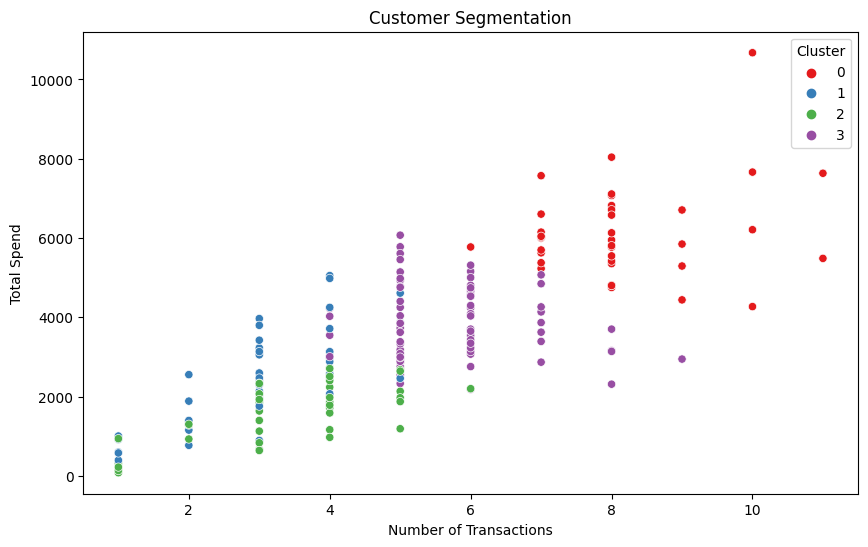

In [110]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_profile['NumTransactions'], y=customer_profile['TotalSpend'], hue=customer_profile['Cluster'], palette='Set1')
plt.title('Customer Segmentation')
plt.xlabel('Number of Transactions')
plt.ylabel('Total Spend')
plt.legend(title='Cluster')
plt.show()

# Clusters and Evaluation Metrices

In [111]:
num_clusters = len(set(kmeans.labels_))
print(f'Number of clusters formed: {num_clusters}')
print(f'Cluster Centers: {kmeans.cluster_centers_}')

clustered_customers = customer_profile[['CustomerID', 'Cluster']]
clustered_customers.to_csv('Clustered_Customers.csv', index=False)

Number of clusters formed: 4
Cluster Centers: [[ 1.43060142  1.45989407  1.51220823  0.14823417]
 [-0.93465291 -0.52653084 -0.91309982  1.0761604 ]
 [-0.76201735 -0.98284998 -0.72303507 -1.0831366 ]
 [ 0.3008952   0.20203401  0.2217955   0.03264817]]
